In [1]:
utf8::utf8_print('\U0001f6a7 work in progress \U0001f6a7')

[1] "🚧​ work in progress 🚧​"


# click_annotvcf annotations analysis

**Goal:** This notebook studies the annotations added with click_annotvcf, see [/data/annotate_with_click_annotvcf](https://github.com/ElsaB/impact-annotator/tree/master/data/annotate_with_click_annotvcf).  
This notebook is divided in 3 parts:
* **1. Get click_annotvcf annotations**
* **2. IMPACT annotations vs VAGrENT annotations vs VEP annotations**
* **4. Other VEP annotations**

**Refs:**
* [data/annotate_with_click_annotvcf](
https://github.com/ElsaB/impact-annotator/tree/master/data/annotate_with_click_annotvcf)

In [2]:
source("../../../src/utils/custom_tools.R")
setup_environment("../../../src/utils")

In [3]:
impact <- read.table("../../../data/cleaned_IMPACT_mutations_180508.txt", sep = "\t", stringsAsFactors = FALSE, header = TRUE)
impact <- add_features("../../../data/", impact, annotations = TRUE, oncokb = TRUE)

## Get click_annotvcf annotations

Get the features from `click_annotvcf_IMPACT_mutations_180508.txt` (impact annotated by the click_annotvcf pipeline).

### Get the raw data

In [4]:
impact_annotated <- read.table("../../../data/annotate_with_click_annotvcf/click_annotvcf_IMPACT_mutations_180508.txt",
                               sep = "\t", stringsAsFactors = FALSE, header = TRUE, comment = "#")

In [5]:
ncol(impact_annotated)
nrow(impact_annotated)
head(impact_annotated)

[1] 157

[1] 406770

ID_VARIANT    TARGET_NAME REFERENCE_NAME CHR START   END     REF ALT
1 1_2487766_T_C NA          NA             1   2487766 2487766 T   C  
2 1_2487954_G_A NA          NA             1   2487954 2487954 G   A  
3 1_2487984_C_A NA          NA             1   2487984 2487984 C   A  
4 1_2487998_C_G NA          NA             1   2487998 2487998 C   G  
5 1_2487998_C_T NA          NA             1   2487998 2487998 C   T  
6 1_2488032_A_G NA          NA             1   2488032 2488032 A   G  
  CONTEXT_5 CHANGE CONTEXT_3 QUAL CALLED_BY PASSED_BY NUMBER_OF_CALLERS
1 TGGAA     C      GGTGC     NA   NA        NA        0                
2 GCTCG     A      GTTCT     NA   NA        NA        0                
3 CGAGG     A      GGATT     NA   NA        NA        0                
4 TTTCT     G      TTTCT     NA   NA        NA        0                
5 TTTCT     T      TTTCT     NA   NA        NA        0                
6 CAGCA     G      TGGCG     NA   NA        NA        0                
  FLAGS_ALL TARGET_VAF_MEAN TARGET_VAF_STD REFERENCE_VAF_MEAN REFERENCE_VAF_STD
1 PASS      NA              NA             NA                 NA               
2 PASS      NA              NA             NA                 NA               
3 PASS      NA              NA             NA                 NA               
4 PASS      NA              NA             NA                 NA               
5 PASS      NA              NA             NA                 NA               
6 PASS      NA              NA             NA                 NA               
  mutect_TARGET_VAF mutect_TARGET_DEPTH mutect_REFERENCE_VAF
1 NA                NA                  NA                  
2 NA                NA                  NA                  
3 NA                NA                  NA                  
4 NA                NA                  NA                  
5 NA                NA                  NA                  
6 NA                NA                  NA                  
  mutect_REFERENCE_DEPTH mutect_DIRPROP mutect_READS_FORWARD
1 NA                     NA             NA                  
2 NA                     NA             NA                  
3 NA                     NA             NA                  
4 NA                     NA             NA                  
5 NA                     NA             NA                  
6 NA                     NA             NA                  
  mutect_READS_REVERSE strelka_TARGET_VAF strelka_TARGET_DEPTH
1 NA                   NA                 NA                  
2 NA                   NA                 NA                  
3 NA                   NA                 NA                  
4 NA                   NA                 NA                  
5 NA                   NA                 NA                  
6 NA                   NA                 NA                  
  strelka_REFERENCE_VAF strelka_REFERENCE_DEPTH caveman_TARGET_VAF
1 NA                    NA                      NA                
2 NA                    NA                      NA                
3 NA                    NA                      NA                
4 NA                    NA                      NA                
5 NA                    NA                      NA                
6 NA                    NA                      NA                
  caveman_TARGET_DEPTH caveman_REFERENCE_VAF caveman_REFERENCE_DEPTH
1 NA                   NA                    NA                     
2 NA                   NA                    NA                     
3 NA                   NA                    NA                     
4 NA                   NA                    NA                     
5 NA                   NA                    NA                     
6 NA                   NA                    NA                     
  caveman_DIRPROP caveman_READS_FORWARD caveman_READS_REVERSE CAVEMAN_DS
1 NA              NA                    NA                    NA        
2 NA              NA                    NA      

We keep the following features:
* `id_colnames`: variant identification columns (chromosome, start position, ...)
* `vag_colnames`: VAGrENT most deleterious annotation
* `vep_colnames`: VEP v92 annotations
     * `VEP_BIOTYPE`: Biotype of transcript or regulatory feature
     * ...
* `vep_add_colnames`: VEP v92 annotations (polyphen: 2.2.2, sift: sift5.2.2, COSMIC v81)
    * `VEP_IMPACT`: Subjective impact classification of consequence type
    * `VEP_CLIN_SIG`: ClinVar clinical significance of the dbSNP variant
    * `VEP_AF`: Frequency of existing variant in 1000 Genomes combined population
    * `VEP MAX_AF`: Maximum observed allele frequency in 1000 Genomes, ESP and ExAC/gnomAD
    * `VEP MAX_AF_POPS`: Populations in which maximum allele frequency was observed
    * ...

In [6]:
id_colnames  <- c("ID_VARIANT", "CHR", "START", "END", "REF", "ALT")
vag_colnames <- c("VAG_VT", "VAG_GENE", "VAG_cDNA_CHANGE", "VAG_PROTEIN_CHANGE", "VAG_EFFECT")
vep_colnames <- c("VEP_Consequence", "VEP_SYMBOL", "VEP_HGVSc", "VEP_HGVSp", "VEP_Amino_acids", "VEP_VARIANT_CLASS", "VEP_BIOTYPE")
vep_add_colnames <- c("VEP_IMPACT", "VEP_CLIN_SIG",
                       "VEP_AF", "VEP_MAX_AF", "VEP_MAX_AF_POPS", "VEP_gnomAD_AF",
                       "VEP_SIFT", "VEP_PolyPhen", "VEP_COSMIC_CNT")

colnames_to_keep <- c(id_colnames, vag_colnames, vep_colnames, vep_add_colnames)

impact_annotated <- impact_annotated[, colnames_to_keep]

### Create keys to join the two dataframes and extract the features

We are going to identify each mutation with a key in both dataframes, allowing us to link each mutation from `impact` to its corresponding mutation in `impact_annotated`. The keys will be: 
* `mut_key` for `impact`
* `CHR`\_`START`\_`REF`\_`ALT` for `impact_annotated`, however because the file was annotated from `impact` converted to `.vcf` format, there's a correction to be made for `INS` and `DEL` (ex: for insertions the syntax is `-/A` for `impact` vs `T/TA` for `impact_annotated`).

In [7]:
get_join_key <- function(data) {
    
    # if insertion or deletion
    if (substr(data["REF"], 1, 1) == substr(data["ALT"], 1, 1) &
        (nchar(data["REF"]) == 1 | nchar(data["ALT"]) == 1)) {
        
        # remove leading base
        data["REF"] = substr(data["REF"], 2, nchar(data["REF"]))
        data["ALT"] = substr(data["ALT"], 2, nchar(data["ALT"]))
        
        # different correction for insertion vs deletion
        if (nchar(data["REF"]) == 0)
            data["REF"] = '-'
        else {
            data["ALT"] = '-'
            data["START"] = as.numeric(data["START"]) + 1
        }
    }

    return (gsub(' ', '', (paste(data["CHR"], data["START"], data["REF"], data["ALT"], sep = "_"))))
}

impact_annotated$join_key <- apply(impact_annotated, 1, get_join_key)
head(impact_annotated$join_key)

[1] "1_2487766_T_C" "1_2487954_G_A" "1_2487984_C_A" "1_2487998_C_G"
[5] "1_2487998_C_T" "1_2488032_A_G"

**Verification 1** Make sure every impact `mut_key` has an analoguous `join_key` in `impact_annotated`:

Somehow some insertions and deletions don't have the same format, but have the original `.vcf` format.

In [8]:
is_unmatched <- which(! impact$mut_key %in% impact_annotated$join_key)
table(impact$Variant_Type[is_unmatched]) # only DEL and INS
head(impact[is_unmatched, c("Variant_Type", "Reference_Allele", "Tumor_Seq_Allele2")]) # which have the .vcf format
head(impact$cDNA_change[is_unmatched], 10)


DEL INS 
 78   9 

,Variant_Type,Reference_Allele,Tumor_Seq_Allele2
8669,DEL,GAGCAGCAGC,G
22259,DEL,GTGATAGCACTGAGAGCACTGCGAACAGGCAAGGAGGTGGCCCTCTGCCCCCCGGCCAA,G
33515,DEL,AACCCATGTATGAAGT,A
36147,DEL,GCCTCCGGCCCCGAAGAGCCCCT,G
40602,DEL,ACCTGCCAGAG,A
41558,DEL,AT,A


[1] "c.186_196delinsCT"                    
 [2] "c.4157_4216delinsCA"                  
 [3] "c.1648_1664delinsCA"                  
 [4] "c.491_514delinsCT"                    
 [5] "c.194-9_196delinsTG"                  
 [6] "c.320_322delinsTA"                    
 [7] "c.2033_2035delinsCT"                  
 [8] "c.6835_6836delinsGTA"                 
 [9] "c.1726_1727delinsATGATCACAAATGGGAGTGA"
[10] "c.1726_1727delinsATGATCACAAATGGGAGTGA"

In [9]:
is_matched <- which(impact$mut_key %in% impact_annotated$join_key)
head(impact$cDNA_change[is_matched][impact$Variant_Type == "INS"], 10)

[1] "c.2538dupT"          "c.875dupA"           "c.906_907insC"      
 [4] "c.903_906delinsACAC" "c.1344dupA"          "c.620dupA"          
 [7] "c.2206dupA"          "c.2864dupC"          "c.1003dupT"         
[10] "c.1364dupA"

Not sure what to do, remove them from now:

In [10]:
impact <- impact[is_matched,]

**Verification 2** The features are unique for each `join_key`:

In [11]:
impact_annotated <- unique(impact_annotated)

In [12]:
nrow(impact_annotated %>% group_by(join_key) %>% filter(n() > 1))

[1] 0

In [13]:
colnames_to_keep <- c(vag_colnames, vep_colnames, vep_add_colnames)

In [14]:
impact[, colnames_to_keep] <- left_join(impact, impact_annotated,
                                        by = c("mut_key" = "join_key"))[, c(vag_colnames, vep_colnames, vep_add_colnames)]

In [15]:
head(impact)

Hugo_Symbol,Chromosome,Start_Position,End_Position,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,cDNA_change,HGVSp_Short,t_depth,t_vaf,t_alt_count,n_depth,n_vaf,n_alt_count,t_ref_plus_count,t_ref_neg_count,t_alt_plus_count,t_alt_neg_count,confidence_class,sample_coverage,mut_key,sample_mut_key,frequency_in_normals,Kaviar_AF,cosmic_count,is_a_hotspot,is_a_3d_hotspot,oncogenic,VAG_VT,VAG_GENE,VAG_cDNA_CHANGE,VAG_PROTEIN_CHANGE,VAG_EFFECT,VEP_Consequence,VEP_SYMBOL,VEP_HGVSc,VEP_HGVSp,VEP_Amino_acids,VEP_VARIANT_CLASS,VEP_BIOTYPE,VEP_IMPACT,VEP_CLIN_SIG,VEP_AF,VEP_MAX_AF,VEP_MAX_AF_POPS,VEP_gnomAD_AF,VEP_SIFT,VEP_PolyPhen,VEP_COSMIC_CNT
TP53,17,7577515,7577515,nonsynonymous_SNV,SNP,T,G,P-0000012-T02-IM3,c.766A>C,p.T256P,227,0.50220,114,569,0.00000,0,59,54,58,56,AUTO_OK,344,17_7577515_T_G,P-0000012-T02-IM3_17_7577515_T_G,0,0.0e+00,1,unknown,unknown,Likely Oncogenic,Sub,TP53,c.766A>C,p.T256P,non_synonymous_codon,missense_variant,TP53,ENST00000269305.4:c.766A>C,ENSP00000269305.4:p.Thr256Pro,T/P,SNV,protein_coding,MODERATE,NA,NA,NA,NA,NA,deleterious(0),probably_damaging(0.999),1
ARID1A,1,27101572,27101572,synonymous_SNV,SNP,C,G,P-0000012-T02-IM3,c.4854C>G,p.P1618P,281,0.07829,22,879,0.00000,0,126,129,11,11,UNKNOWN,344,1_27101572_C_G,P-0000012-T02-IM3_1_27101572_C_G,0,0.0e+00,0,unknown,unknown,Unknown,Sub,ARID1A,c.4854C>G,p.P1618P,synonymous_codon,synonymous_variant,ARID1A,ENST00000324856.7:c.4854C>G,ENSP00000320485.7:p.Pro1618%3D,P,SNV,protein_coding,LOW,NA,NA,NA,NA,NA,NA,NA,NA
PTPRS,19,5244030,5244030,synonymous_SNV,SNP,C,G,P-0000012-T02-IM3,c.1452G>C,p.L484L,299,0.37793,113,730,0.00274,2,97,87,61,52,UNKNOWN,344,19_5244030_C_G,P-0000012-T02-IM3_19_5244030_C_G,0,0.0e+00,0,unknown,unknown,Unknown,Sub,PTPRS,c.1452G>C,p.L484L,synonymous_codon,synonymous_variant,PTPRS,ENST00000357368.4:c.1452G>C,ENSP00000349932.4:p.Leu484%3D,L,SNV,protein_coding,LOW,NA,NA,NA,NA,NA,NA,NA,NA
PIK3R3,1,46521514,46521514,nonsynonymous_SNV,SNP,G,C,P-0000012-T03-IM3,c.894C>G,p.I298M,733,0.17599,129,1243,0.00000,0,288,316,61,68,AUTO_OK,428,1_46521514_G_C,P-0000012-T03-IM3_1_46521514_G_C,0,0.0e+00,0,unknown,unknown,Unknown,Sub,PIK3R3,c.1032C>G,p.I344M,non_synonymous_codon,missense_variant,PIK3R3,ENST00000262741.5:c.894C>G,ENSP00000262741.5:p.Ile298Met,I/M,SNV,protein_coding,MODERATE,NA,NA,NA,NA,NA,deleterious(0),benign(0.277),NA
ATR,3,142178126,142178126,nonsynonymous_SNV,SNP,C,A,P-0000012-T03-IM3,c.7292G>T,p.R2431M,482,0.17427,84,581,0.00172,1,221,177,46,38,AUTO_OK,428,3_142178126_C_A,P-0000012-T03-IM3_3_142178126_C_A,0,6.5e-06,0,unknown,unknown,Unknown,Sub,ATR,c.7292G>T,p.R2431M,non_synonymous_codon,missense_variant,ATR,ENST00000350721.4:c.7292G>T,ENSP00000343741.4:p.Arg2431Met,R/M,SNV,protein_coding,MODERATE,NA,NA,8.96e-06,gnomAD_NFE,4.063e-06,deleterious(0),probably_damaging(0.997),NA
PDGFRA,4,55139732,55139732,nonsynonymous_SNV,SNP,T,A,P-0000012-T03-IM3,c.1393T>A,p.L465M,570,0.20351,116,811,0.00000,0,252,202,66,50,AUTO_OK,428,4_55139732_T_A,P-0000012-T03-IM3_4_55139732_T_A,0,0.0e+00,0,unknown,unknown,Unknown,Sub,PDGFRA,c.1393T>A,p.L465M,non_synonymous_codon,missense_variant,PDGFRA,ENST00000257290.5:c.1393T>A,ENSP00000257290.5:p.Leu465Met,L/M,SNV,protein_coding,MODERATE,NA,NA,NA,NA,NA,deleterious(0.01),probably_damaging(0.965),NA


## Filtering the features

### Deal with `NA` values

In [16]:
count_na <- function(data) {
    return (sum(is.na(data)))
}

In [17]:
replace_na <- function(data, feature_name, replace_value){
    data[is.na(data[,feature_name]), feature_name] <- replace_value
    
    return (data)
}

#### VAGrENT

In [18]:
for (c in vag_colnames) 
    print(sprintf("%18s: %d", c, count_na(impact[,c])))

[1] "            VAG_VT: 0"
[1] "          VAG_GENE: 158"
[1] "   VAG_cDNA_CHANGE: 515"
[1] "VAG_PROTEIN_CHANGE: 515"
[1] "        VAG_EFFECT: 158"


158 mutations have `VAG_GENE` and `VAG EFFECT` = `NA`, 515 mutations have `VAG_cDNA_CHANGE` and `VAG_PROTEIN_CHANGE` = `NA` (including the 158 preceding ones).

In [19]:
nrow(impact[is.na(impact$VAG_GENE) & is.na(impact$VAG_EFFECT),]) == 158
nrow(impact[is.na(impact$VAG_cDNA_CHANGE) & is.na(impact$VAG_PROTEIN_CHANGE),]) == 515

table(impact$mut_key[is.na(impact$VAG_GENE)] %in% impact$mut_key[is.na(impact$VAG_cDNA_CHANGE)])

[1] TRUE

[1] TRUE


TRUE 
 158 

[1] "Number of different genes:  97"
[1] "Number of different genes:  130"


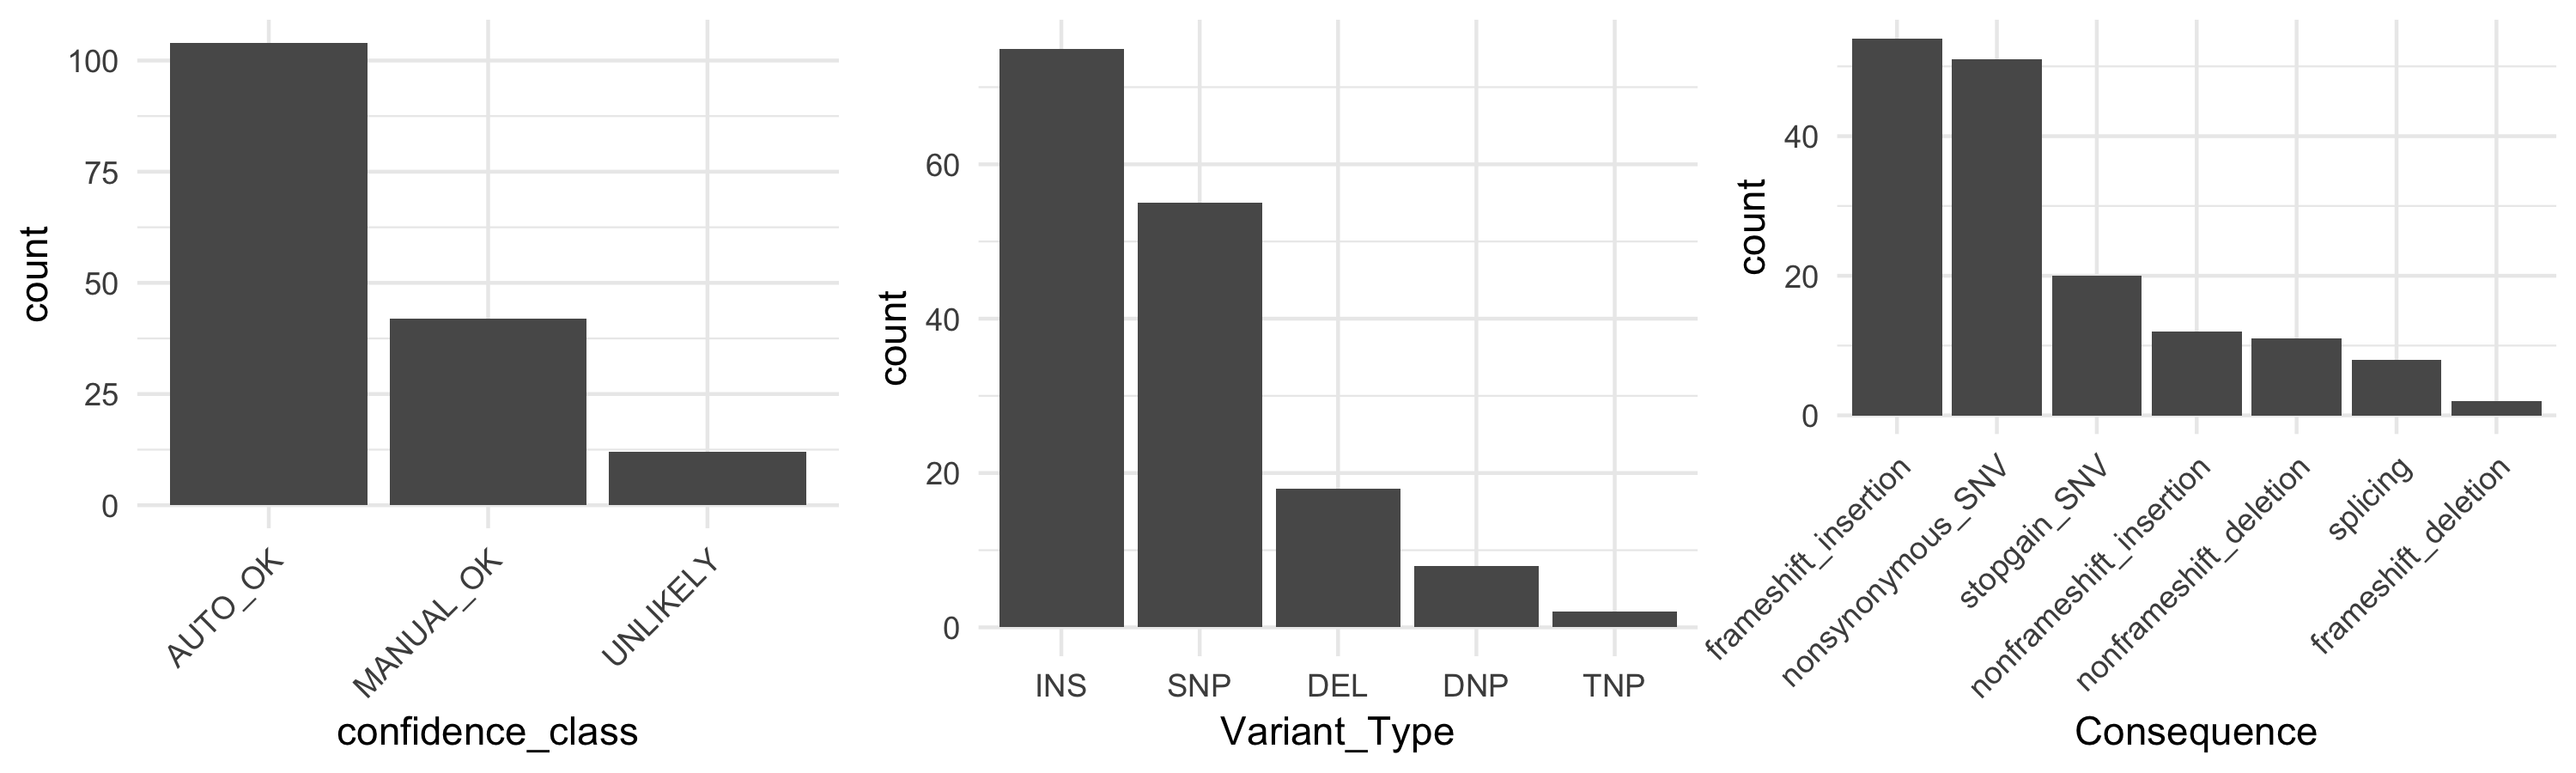

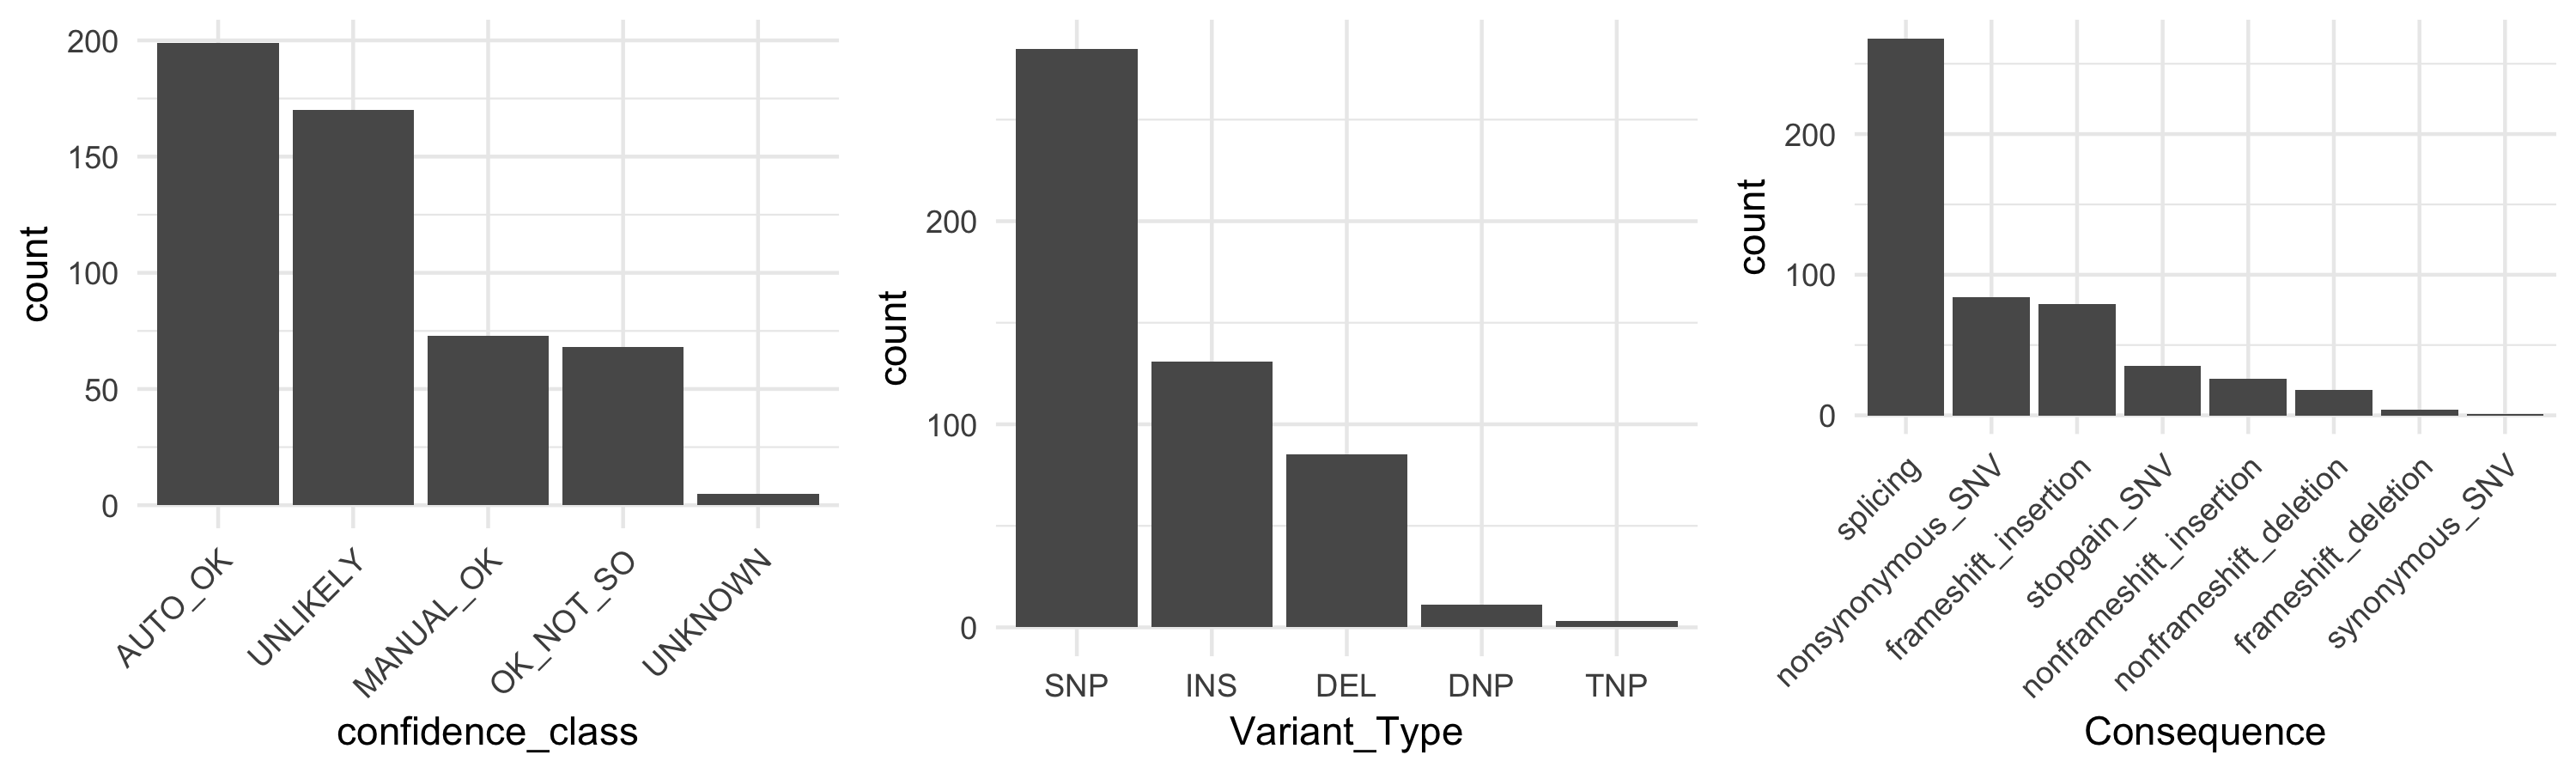

In [20]:
get_possible_correlations(impact[is.na(impact$VAG_GENE),])
get_possible_correlations(impact[is.na(impact$VAG_cDNA_CHANGE),])

In [21]:
impact <- replace_na(impact, "VAG_GENE"          , "unknown")
impact <- replace_na(impact, "VAG_EFFECT"        , "unknown")
impact <- replace_na(impact, "VAG_cDNA_CHANGE"   , "unknown")
impact <- replace_na(impact, "VAG_PROTEIN_CHANGE", "unknown")

#### VEP

In [22]:
for (c in vep_colnames)
    print(sprintf("%17s: %d", c, count_na(impact[,c])))

[1] "  VEP_Consequence: 0"
[1] "       VEP_SYMBOL: 49"
[1] "        VEP_HGVSc: 71"
[1] "        VEP_HGVSp: 8811"
[1] "  VEP_Amino_acids: 8794"
[1] "VEP_VARIANT_CLASS: 0"
[1] "      VEP_BIOTYPE: 49"


49 mutations have `VEP_BIOTYPE` and `VEP_SYMBOL` = `NA`, because they are considered as `intergenic` by VEP.

In [23]:
nrow(impact[is.na(impact$VEP_BIOTYPE) & is.na(impact$VEP_SYMBOL),]) == 49
length(unique(impact$mut_key[is.na(impact$VEP_BIOTYPE)]))
table(impact$VEP_Consequence[is.na(impact$VEP_BIOTYPE)])
table(impact$Consequence[is.na(impact$VEP_BIOTYPE)])

[1] TRUE

[1] 49


intergenic_variant 
                49 


 nonframeshift_deletion nonframeshift_insertion       nonsynonymous_SNV 
                     10                       4                      26 
               splicing            stopgain_SNV 
                      1                       8 

8811 mutations have `VEP_HGVSp` = `NA`, most of them being splicing mutations.

In [24]:
get_table(impact$VEP_Consequence[is.na(impact$VEP_HGVSp)]) %>% filter(count >= 50)
get_table(impact$Consequence[is.na(impact$VEP_HGVSp)])

values,count,freq
splice_acceptor_variant,3063,34.8%
splice_donor_variant,2534,28.8%
splice_region_variant&intron_variant,1101,12.5%
splice_acceptor_variant&coding_sequence_variant&intron_variant,444,5%
splice_donor_variant&coding_sequence_variant&intron_variant,427,4.8%
intron_variant,299,3.4%
splice_donor_variant&coding_sequence_variant,155,1.8%
splice_acceptor_variant&intron_variant,108,1.2%
splice_acceptor_variant&coding_sequence_variant,97,1.1%
splice_acceptor_variant&splice_donor_variant&coding_sequence_variant&intron_variant,90,1%


values,count,freq
splicing,8168,92.7%
nonsynonymous_SNV,229,2.6%
synonymous_SNV,128,1.5%
frameshift_deletion,121,1.4%
nonframeshift_deletion,94,1.1%
stopgain_SNV,35,0.4%
frameshift_insertion,19,0.2%
nonframeshift_insertion,17,0.2%
-- total --,8811,100%


In [25]:
count_na(impact$VEP_Amino_acids)
table(impact$mut_key[is.na(impact$VEP_Amino_acids)] %in% impact$mut_key[is.na(impact$VEP_HGVSp)])

[1] 8794


FALSE  TRUE 
   83  8711 

In [26]:
impact <- replace_na(impact, "VEP_BIOTYPE"    , "unknown")
impact <- replace_na(impact, "VEP_SYMBOL"     , "unknown")
impact <- replace_na(impact, "VEP_HGVSc"      , "unknown")
impact <- replace_na(impact, "VEP_HGVSp"      , "unknown")
impact <- replace_na(impact, "VEP_Amino_acids", "unknown")

#### VEP additional

In [27]:
for (c in vep_add_colnames)
    print(sprintf("%17s: %d", c, count_na(impact[,c])))

[1] "       VEP_IMPACT: 0"
[1] "     VEP_CLIN_SIG: 215110"
[1] "           VEP_AF: 236757"
[1] "       VEP_MAX_AF: 196853"
[1] "  VEP_MAX_AF_POPS: 191563"
[1] "    VEP_gnomAD_AF: 192164"
[1] "         VEP_SIFT: 106989"
[1] "     VEP_PolyPhen: 105935"
[1] "   VEP_COSMIC_CNT: 175548"


`NA` values might correspond to not found, we replace them by `"unknown"` or a null allele value for the numeric variables.

In [28]:
impact <- replace_na(impact, "VEP_CLIN_SIG"  , "unknown")
impact <- replace_na(impact, "VEP_SIFT"      , "unknown")
impact <- replace_na(impact, "VEP_PolyPhen"  , "unknown")
impact <- replace_na(impact, "VEP_COSMIC_CNT", "unknown")

impact <- replace_na(impact, "VEP_AF"         , 0.0)
impact <- replace_na(impact, "VEP_MAX_AF"     , 0.0)
impact <- replace_na(impact, "VEP_MAX_AF_POPS", "unknown")
impact <- replace_na(impact, "VEP_gnomAD_AF"  , 0.0)

### Process raw features

#### `VEP_Consequence`

In [29]:
dd <- head(unique(impact$VEP_Consequence), 20)
dd <- data.frame(dd, sapply(dd, function(x) strsplit(x, '&')[[1]][1]), row.names = NULL)
colnames(dd) <- c("old", "new")
dd

old,new
missense_variant,missense_variant
synonymous_variant,synonymous_variant
splice_acceptor_variant,splice_acceptor_variant
stop_gained,stop_gained
splice_donor_variant,splice_donor_variant
start_lost,start_lost
missense_variant&splice_region_variant,missense_variant
frameshift_variant,frameshift_variant
frameshift_variant&splice_region_variant,frameshift_variant
splice_acceptor_variant&coding_sequence_variant&intron_variant,splice_acceptor_variant


In [30]:
head(impact[impact$VEP_Consequence == "missense_variant&splice_region_variant",])

,Hugo_Symbol,Chromosome,Start_Position,End_Position,Consequence,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,Tumor_Sample_Barcode,cDNA_change,HGVSp_Short,t_depth,t_vaf,t_alt_count,n_depth,n_vaf,n_alt_count,t_ref_plus_count,t_ref_neg_count,t_alt_plus_count,t_alt_neg_count,confidence_class,sample_coverage,mut_key,sample_mut_key,frequency_in_normals,Kaviar_AF,cosmic_count,is_a_hotspot,is_a_3d_hotspot,oncogenic,VAG_VT,VAG_GENE,VAG_cDNA_CHANGE,VAG_PROTEIN_CHANGE,VAG_EFFECT,VEP_Consequence,VEP_SYMBOL,VEP_HGVSc,VEP_HGVSp,VEP_Amino_acids,VEP_VARIANT_CLASS,VEP_BIOTYPE,VEP_IMPACT,VEP_CLIN_SIG,VEP_AF,VEP_MAX_AF,VEP_MAX_AF_POPS,VEP_gnomAD_AF,VEP_SIFT,VEP_PolyPhen,VEP_COSMIC_CNT
29,PTPRT,20,40748610,40748610,nonsynonymous_SNV,SNP,C,A,P-0000012-T03-IM3,c.2906G>T,p.G969V,443,0.14221,63,769,0,0,181,199,27,36,AUTO_OK,428,20_40748610_C_A,P-0000012-T03-IM3_20_40748610_C_A,0,0.0e+00,0,unknown,unknown,Unknown,Sub,PTPRT,c.2906G>T,p.G969V,non_synonymous_codon,missense_variant&splice_region_variant,PTPRT,ENST00000373187.1:c.2849G>T,ENSP00000362283.1:p.Gly950Val,G/V,SNV,protein_coding,MODERATE,unknown,0,0,unknown,0,deleterious(0),probably_damaging(0.999),unknown
144,BRCA2,13,32945237,32945237,nonsynonymous_SNV,SNP,G,A,P-0000060-T01-IM3,c.8632G>A,p.E2878K,441,0.33560,148,181,0,0,101,190,43,105,AUTO_OK,731,13_32945237_G_A,P-0000060-T01-IM3_13_32945237_G_A,0,6.5e-06,0,unknown,unknown,Unknown,Sub,BRCA2,c.8632G>A,p.E2878K,non_synonymous_codon,missense_variant&splice_region_variant,BRCA2,ENST00000544455.1:c.8632G>A,ENSP00000439902.1:p.Glu2878Lys,E/K,SNV,protein_coding,MODERATE,uncertain_significance&likely_pathogenic,0,0,unknown,0,deleterious(0.02),benign(0.157),unknown
155,IGF1R,15,99486153,99486153,nonsynonymous_SNV,SNP,T,G,P-0000062-T01-IM3,c.3459T>G,p.D1153E,996,0.06928,69,318,0,0,543,384,44,25,AUTO_OK,1176,15_99486153_T_G,P-0000062-T01-IM3_15_99486153_T_G,0,0.0e+00,0,unknown,unknown,Unknown,Sub,IGF1R,c.3459T>G,p.D1153E,non_synonymous_codon,missense_variant&splice_region_variant,IGF1R,ENST00000268035.6:c.3459T>G,ENSP00000268035.6:p.Asp1153Glu,D/E,SNV,protein_coding,MODERATE,unknown,0,0,unknown,0,deleterious(0),probably_damaging(0.995),unknown
199,U2AF1,21,44527561,44527561,nonsynonymous_SNV,SNP,T,C,P-0000069-T01-IM3,c.44A>G,p.K15R,920,0.25761,237,391,0,0,409,274,137,100,AUTO_OK,735,21_44527561_T_C,P-0000069-T01-IM3_21_44527561_T_C,0,0.0e+00,0,unknown,unknown,Unknown,Sub,U2AF1,c.44A>G,p.K15R,non_synonymous_codon,missense_variant&splice_region_variant,U2AF1,ENST00000291552.4:c.44A>G,ENSP00000291552.4:p.Lys15Arg,K/R,SNV,protein_coding,MODERATE,unknown,0,0,unknown,0,tolerated(0.66),benign(0.127),unknown
209,FIP1L1,4,54292041,54292041,nonsynonymous_SNV,SNP,G,A,P-0000071-T01-IM3,c.881G>A,p.R294K,415,0.06988,29,167,0,0,239,147,21,8,AUTO_OK,795,4_54292041_G_A,P-0000071-T01-IM3_4_54292041_G_A,0,0.0e+00,0,unknown,unknown,Unknown,Sub,FIP1L1,c.926G>A,p.R309K,non_synonymous_codon,missense_variant&splice_region_variant,FIP1L1,ENST00000337488.6:c.926G>A,ENSP00000336752.6:p.Arg309Lys,R/K,SNV,protein_coding,MODERATE,unknown,0,0,unknown,0,tolerated(1),benign(0.063),unknown
211,POLE,12,133252789,133252789,nonsynonymous_SNV,SNP,C,T,P-0000071-T01-IM3,c.911G>A,p.G304D,655,0.15267,100,229,0,0,207,348,36,64,AUTO_OK,795,12_133252789_C_T,P-0000071-T01-IM3_12_133252789_C_T,0,0.0e+00,0,unknown,unknown,Unknown,Sub,POLE,c.911G>A,p.G304D,non_synonymous_codon,missense_variant&splice_region_variant,POLE,ENST00000320574.5:c.911G>A,ENSP00000322570.5:p.Gly304Asp,G/D,SNV,protein_coding,MODERATE,unknown,0,0,unknown,0,deleterious(0),probably_damaging(0.999),unknown


In [31]:
impact$VEP_Consequence <- sapply(impact$VEP_Consequence, function(x) strsplit(x, '&')[[1]][1])

#### `VEP_HGVSc`

In [32]:
dd <- head(impact$VEP_HGVSc, 10)
dd <- data.frame(dd, sapply(dd, function(x) strsplit(x, ':')[[1]][2]), row.names = NULL)
colnames(dd) <- c("old", "new")
dd

old,new
ENST00000269305.4:c.766A>C,c.766A>C
ENST00000324856.7:c.4854C>G,c.4854C>G
ENST00000357368.4:c.1452G>C,c.1452G>C
ENST00000262741.5:c.894C>G,c.894C>G
ENST00000350721.4:c.7292G>T,c.7292G>T
ENST00000257290.5:c.1393T>A,c.1393T>A
ENST00000281708.4:c.1237-1G>T,c.1237-1G>T
ENST00000281708.4:c.181G>T,c.181G>T
ENST00000264932.6:c.1444C>T,c.1444C>T
ENST00000399503.3:c.904G>T,c.904G>T


In [33]:
impact$VEP_HGVSc <- sapply(impact$VEP_HGVSc, function(x) strsplit(x, ':')[[1]][2])

#### `VEP_HGVSp`

In [34]:
get_HGVSp_from_vep <- function(HGVSp_string) {
    
    if (HGVSp_string == "unknown")
        return ("unknown")
    
    HGVSp_string <- strsplit(HGVSp_string, ':')[[1]][2]
    
    protein_long_name <- c('Ala', 'Arg', 'Asn', 'Asp', 'Cys', 'Glu', 'Gln', 'Gly', 'His', 'Ile', 'Leu', 'Lys',
                           'Met', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 'Tyr', 'Val')
    protein_short_name <- c('A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I', 'L', 'K',
                            'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V')
    
    for (name in protein_long_name)
        HGVSp_string <- gsub(name, protein_short_name[match(name, protein_long_name)], HGVSp_string)
    
    HGVSp_string <- gsub('Ter', '*', HGVSp_string)
    HGVSp_string <- gsub('%3D', '=', HGVSp_string)
    
    return (HGVSp_string)
}

In [35]:
dd <- head(impact$VEP_HGVSp, 10)
dd <- data.frame(dd, sapply(dd, get_HGVSp_from_vep), row.names = NULL)
colnames(dd) <- c("old", "new")
dd

old,new
ENSP00000269305.4:p.Thr256Pro,p.T256P
ENSP00000320485.7:p.Pro1618%3D,p.P1618=
ENSP00000349932.4:p.Leu484%3D,p.L484=
ENSP00000262741.5:p.Ile298Met,p.I298M
ENSP00000343741.4:p.Arg2431Met,p.R2431M
ENSP00000257290.5:p.Leu465Met,p.L465M
unknown,unknown
ENSP00000281708.3:p.Gly61Ter,p.G61*
ENSP00000264932.6:p.Pro482Ser,p.P482S
ENSP00000382423.3:p.Glu302Ter,p.E302*


In [ ]:
impact$VEP_HGVSp <- sapply(impact$VEP_HGVSp, get_HGVSp_from_vep)

#### `VEP_SIFT`

In [ ]:
dd <- head(unique(impact$VEP_SIFT), 10)
dd <- data.frame(dd,
                 sapply(dd, function(x) strsplit(x, '\\(')[[1]][1]),
                 sapply(dd, function(x) as.numeric(gsub(')', '', strsplit(x, '\\(')[[1]][2]))),
                 row.names = NULL)
colnames(dd) <- c("old", "new1", "new2")
dd

In [ ]:
impact$VEP_SIFT_class <- sapply(impact$VEP_SIFT, function(x) strsplit(x, '\\(')[[1]][1])
impact$VEP_SIFT_score <- sapply(impact$VEP_SIFT, function(x) as.numeric(gsub(')', '', strsplit(x, '\\(')[[1]][2])))
impact$VEP_SIFT <- NULL

#### `VEP_PolyPhen`

In [ ]:
dd <- head(unique(impact$VEP_PolyPhen), 10)
dd <- data.frame(dd,
                 sapply(dd, function(x) strsplit(x, '\\(')[[1]][1]),
                 sapply(dd, function(x) as.numeric(gsub(')', '', strsplit(x, '\\(')[[1]][2]))),
                 row.names = NULL)
colnames(dd) <- c("old", "new1", "new2")
dd

In [ ]:
impact$VEP_PolyPhen_class <- sapply(impact$VEP_PolyPhen, function(x) strsplit(x, '\\(')[[1]][1])
impact$VEP_PolyPhen_score <- sapply(impact$VEP_PolyPhen, function(x) as.numeric(gsub(')', '', strsplit(x, '\\(')[[1]][2])))
impact$VEP_PolyPhen <- NULL

#### `VEP_COSMIC_CNT`

In [ ]:
get_cosmic_count <- function(cosmic_cnt_string) {
    if (cosmic_cnt_string == "unknown")
        return (0)
    else
        return (sum(as.numeric(strsplit(cosmic_cnt_string, '&')[[1]])))
}

dd <- head(unique(impact$VEP_COSMIC_CNT), 10)
dd <- data.frame(dd, sapply(dd, get_cosmic_count), row.names = NULL)
colnames(dd) <- c("old", "new1")
dd

In [ ]:
impact$VEP_COSMIC <- sapply(impact$VEP_COSMIC, get_cosmic_count)

In [ ]:
impact_backup <- impact

## IMPACT annotations vs VAGrENT annotations vs VEP annotations

### `Variant_Type` vs `VAG_VT` vs `VEP_VARIANT_CLASS`

This three features are globally concordant, except both VAG and VEP have a special category for indels.

In [ ]:
table(impact$Variant_Type, impact$VAG_VT)
table(impact$Variant_Type, impact$VEP_VARIANT_CLASS)

plot_contingency_table_as_histograms(impact, "Variant_Type", "VAG_VT", height = 2)
plot_contingency_table_as_histograms(impact, "Variant_Type", "VEP_VARIANT_CLASS", height = 2)

### `Consequence` vs `VAG_EFFECT` vs `VEP_Consequence`

In [ ]:
get_table(impact$VAG_EFFECT)
plot_contingency_table_as_histograms(impact, "VAG_EFFECT", "Consequence", height = 4, flip = TRUE)

In [ ]:
get_table(impact$VEP_Consequence)
plot_contingency_table_as_histograms(impact, "VEP_Consequence", "Consequence", height = 4, flip = TRUE)

### `Hugo_Symbol` vs `VEP_SYMBOL`

In [ ]:
compare_features <- function(data, feature_1_name, feature_2_name) {
    
    dd <- data %>% group_by(!!sym(feature_1_name), !!sym(feature_2_name)) %>%
                   filter(!!sym(feature_1_name) != !!sym(feature_2_name)) %>%
                   summarise(count = n(), feature_2_name = unique(!!sym(feature_2_name))) %>%
                   select(!!sym(feature_1_name), !!sym(feature_2_name), count) %>%
                   arrange(-count, !!sym(feature_1_name))    
    
    print(print_count_and_proportion(nrow(dd), length(unique(data[,feature_1_name]))))
    print(print_count_and_proportion(sum(dd$count), nrow(data)))

    return(dd)
}

In [ ]:
dd <- compare_features(impact, "Hugo_Symbol", "VEP_SYMBOL")
head(dd, 20)

### `cDNA_change` vs `VAG_cDNA_CHANGE` vs `VEP_HGVSc`

In [ ]:
head(compare_features(impact, "cDNA_change", "VAG_cDNA_CHANGE"))
head(compare_features(impact, "cDNA_change", "VEP_HGVSc"))

### `HGVSp_Short` vs `VAG_PROTEIN_CHANGE` vs `VEP_HGVSp`

In [ ]:
head(compare_features(impact, "HGVSp_Short", "VAG_PROTEIN_CHANGE"))
head(compare_features(impact, "HGVSp_Short", "VEP_HGVSp"))

In [ ]:
head(compare_features(impact[! impact$Consequence %in% c("synonymous_SNV", "splicing", "frameshift_insertion", "frameshift_deletion"),], "HGVSp_Short", "VEP_HGVSp"))

## Other VEP annotations

### `VEP_Amino_acids`

In [ ]:
head(impact[, c("VEP_Amino_acids", "HGVSp_Short", "Consequence")], 10)

### `VEP_BIOTYPE`

In [ ]:
get_table(impact$VEP_BIOTYPE)

### `VEP_IMPACT` and `VEP_CLIN_SIG`

In [ ]:
get_table(impact$VEP_IMPACT)
get_table(impact$VEP_CLIN_SIG) %>% filter(count >= 200)

### VEP SIFT and PolyPhen annotations

In [ ]:
get_table(impact$VEP_SIFT_class)
get_table(impact$VEP_PolyPhen_class)

In [ ]:
plot_contingency_table_as_histograms(impact, "VEP_SIFT_class", "VEP_PolyPhen_class")

In [ ]:
impact_temp <- impact[impact$VEP_SIFT_class != "unknown" & impact$VEP_PolyPhen_class != "unknown",]

Warning sqrt y scale.

In [ ]:
plot1 <- plot_density(impact_temp, "VEP_SIFT_score", fill = "VEP_SIFT_class") + theme(legend.position="bottom") + guides(fill = guide_legend(ncol = 2)) + scale_y_sqrt()
plot2 <- plot_density(impact_temp, "VEP_PolyPhen_score", fill = "VEP_PolyPhen_class") + theme(legend.position="bottom") + guides(fill = guide_legend(ncol = 2)) + scale_y_sqrt()
plot3 <- ggplot(impact_temp) + geom_boxplot(aes(VEP_SIFT_class, VEP_SIFT_score))
plot4 <- ggplot(impact_temp) + geom_boxplot(aes(VEP_PolyPhen_class, VEP_PolyPhen_score))
notebook_plot_size(10, 6)
grid.arrange(plot1, plot2, plot3, plot4, ncol = 2)

In [ ]:
impact$VEP_PolyPhen_score <- 1 - impact$VEP_PolyPhen_score

In [ ]:
plot_density_2d(impact_temp[impact_temp$VEP_SIFT_score != 0 & impact_temp$VEP_PolyPhen_score != 0,],
                "VEP_SIFT_score", "VEP_PolyPhen_score", points_only = TRUE, height = 5) + geom_abline(intercept = 0, slope = 1, color = "purple", size = 0.6)

### VEP AF annotations

In [ ]:
plot1 <- plot_density_2d(impact[impact$Kaviar_AF > 0.001 | impact$VEP_AF > 0.001,], "Kaviar_AF", "VEP_AF", points_only = TRUE, height = 3) + geom_abline(intercept = 0, slope = 1, color ="purple", size = 0.6)
plot2 <- plot_density_2d(impact[impact$Kaviar_AF > 0.001 | impact$VEP_gnomAD_AF > 0.001,], "Kaviar_AF", "VEP_gnomAD_AF", points_only = TRUE, height = 3) + geom_abline(intercept = 0, slope = 1, color ="purple", size = 0.6)
plot_side_by_side(plot1, plot2)

In [ ]:
plot_density_2d(impact, "VEP_AF", "VEP_MAX_AF", points_only = TRUE, height = 3) + geom_abline(intercept = 0, slope = 1, color ="purple", size = 0.6)

In [ ]:
get_table(impact$VEP_MAX_AF_POPS) %>% filter(count >= 3000)

### VEP COSMIC_CNT annotations

In [ ]:
plot1 <- plot_density_2d(impact[impact$cosmic_count > 0 | impact$VEP_COSMIC_CNT > 0,],
                "cosmic_count", "VEP_COSMIC", points_only = TRUE) + 
         geom_abline(intercept = 0, slope = 1, color ="purple", size = 0.6)
plot2 <- plot1 + coord_cartesian(xlim = c(0:500), ylim = c(0:500))

plot_side_by_side(plot1, plot2)

In [ ]:
nrow(impact[impact$cosmic_count == 0 & impact$VEP_COSMIC_CNT > 5,])
nrow(impact[impact$cosmic_count > 5  & impact$VEP_COSMIC_CNT == 0,])

In [ ]:
impact$label <- "passenger"

In [ ]:
impact$label[impact$oncogenic %in% c("Oncogenic", "Likely Oncogenic", "Predicted Oncogenic")] <- "driver"

In [ ]:
get_table(impact$is_driver)

In [ ]:
plot_density(impact, "VEP_SIFT_score", "label")

In [ ]:
impact$VEP_PolyPhen_score <- 1 - impact$VEP_PolyPhen_score

In [ ]:
plot_density <- function(data, feature_name, fill_feature_name = NULL, adjust = 1, width = 10, height = 3, lines = NULL) {
        notebook_plot_size(width, height)
                                                         
        plot <- ggplot(data) + geom_density(aes_string(feature_name, fill = fill_feature_name), adjust = adjust, alpha = 0.2) +
                                                     scale_fill_manual(values = c("#004400", "#44FF44"))
        
        for (value in lines)
                plot <- plot + geom_vline(aes_(xintercept = value), linetype = "dashed", color = "red")
                
        return (plot)
}

In [ ]:
plot_density(impact, "VEP_PolyPhen_score", "label")